In [22]:
!pip install deepface --no-deps
!pip install gdown --no-deps
!pip install retina-face --no-deps
!pip install fire --no-deps

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for gdown: filename=gdown-4.5.3-py3-none-any.whl size=14821 sha256=20091983724e230f7f997db46ad55ae47f6d271105d7f3ee4e3370f64e4aa2ee
  Stored in directory: c:\users\thinkpad ryzen 7\appdata\local\pip\cache\wheels\ed\8a\de\15273923b1f5adacc09306cc48dcedc6b082892569afb2dfc7
Successfully built gdown
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=c3887c75ce5d4d6fbd3042802a114486903ef982f98db7fb171e1550ab76568e
  Stored in directory: c:\users\thinkpad ryzen 7\appdata\local\pip\cache\wheels\2a\93\86\8cd17bc6c40fb605c3ac549d0b860ef7e84ee5f67bf01a3287
Successfully built fire


In [24]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import tensorflow as tf 
import cv2 
import numpy as np 
from mtcnn import MTCNN
import matplotlib.pyplot as plt
from deepface import DeepFace

Directory  C:\Users\thinkpad ryzen 7 /.deepface created
Directory  C:\Users\thinkpad ryzen 7 /.deepface/weights created


In [66]:
detector = MTCNN()

img=cv2.imread("IMG20221025154850.jpg")
location = detector.detect_faces(img)
if len(location) > 0:
    for face in location:
        x, y, width, height = face['box']
        x2, y2 = x + width, y + height
        cv2.rectangle(img, (x, y), (x2, y2), (0, 0, 255), 8)

cv2.imwrite("aldocha.jpg",img)
print("The Image was successfully saved")

1/1 [==============================] - 0s 430ms/step
The Image was successfully saved


Shape of image/array: (4000, 3000, 3)


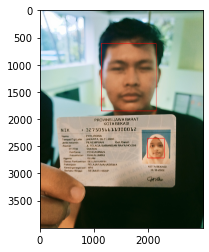

In [67]:
import matplotlib.pyplot as plt
# load image from file
filename = "aldocha.jpg"
pixels = plt.imread(filename)
print("Shape of image/array:",pixels.shape)
imgplot = plt.imshow(pixels)
plt.show()

In [56]:
def emosion_detector(image):
    face_vector = []
    face_detector = MTCNN() #Load model pendeteksi wajah (MTCNN)

    img = plt.imread(image) #Load gambar
    faces = face_detector.detect_faces(img) #Deteksi wajah-wajah yang ada di gambar

    for i in range(len(faces)):
        x, y, w, h = faces[i]['box'] #Ambil koordinat area wajah yang terdeteksi
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 6) #Buat persegi panjang yang sesuai dengan koordinat area wajah dengan warna merah (255,0,0) dan ketebalan 6 pt
        crop = cv2.resize(img[y:y+h,x:x+w],(224,224)) #Potong gambar sesuai dengan area wajah dan mengubah ukuran ke 48x48
        # RGB to GS (3 channel to 1 channel)
        R = crop[:,:,0]
        G = crop[:,:,1]
        B = crop[:,:,2]
        GS = 0.2989*R + 0.5870*G + 0.1140*B
        # GS = GS/255.0 #Scaling gambar
        # crop = crop.reshape(-1,48,48,3) #Ubah ukuran array gambar
        # plt.imshow(GS, cmap='gray')
        face_vector.append(GS)
        cv2.imwrite(f"face_img{i+1}.jpg",crop)
    
    return face_vector

Shape of image/array: (4608, 3456, 3)


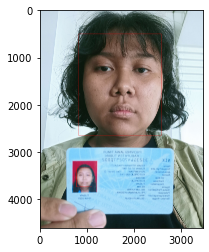

In [25]:
filename_3 = "tian_full_2.jpg"
pixels_3 = plt.imread(filename_3)
print("Shape of image/array:",pixels_3.shape)
imgplot = plt.imshow(pixels_3)
plt.show()

In [62]:
faces = emosion_detector('ochaktp.jpg')

1/1 [==============================] - 0s 387ms/step


In [63]:
vk1 = DeepFace.represent(img_path='face_img1.jpg', enforce_detection=False)
vk2 = DeepFace.represent(img_path='face_img2.jpg', enforce_detection=False)

1/1 [==============================] - 0s 376ms/step


In [64]:
cosine_similarity(np.array([vk1]), np.array([vk2]))

array([[0.78701195]])

In [65]:
CS = cosine_similarity(np.array([vk1]), np.array([vk2]))

if CS > 0.75:
    print('The pictures match')
else:
    print('The pictures do not match')

The pictures match
